In [6]:
from dask.distributed import Client
import os
import dask
import dask.dataframe as dd

filename = 'test.csv'


In [7]:
df = dd.read_csv(filename)

In [1]:
%matplotlib inline
from dask.distributed import Client
import xarray as xr

In [8]:
import numpy as np
ds = xr.Dataset(
    {"foo": (("x", "y"), np.random.randn(2, 3))},
    coords={
        "x": [10, 20],
        "y": ["a", "b", "c"],
        "along_x": ("x", np.random.randn(2)),
        "scalar": 123,
    },
)

ds


<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
  * y        (y) <U1 'a' 'b' 'c'
    along_x  (x) float64 0.2506 0.03906
    scalar   int64 123
Data variables:
    foo      (x, y) float64 -0.3624 -0.7965 -0.2152 -0.04384 0.4255 -0.8626

In [12]:
df = ds.to_dataframe()
df['test']='Nan'

In [13]:
xr.Dataset.from_dataframe(df)

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
  * y        (y) object 'a' 'b' 'c'
Data variables:
    foo      (x, y) float64 -0.3624 -0.7965 -0.2152 -0.04384 0.4255 -0.8626
    along_x  (x, y) float64 0.2506 0.2506 0.2506 0.03906 0.03906 0.03906
    scalar   (x, y) int64 123 123 123 123 123 123
    test     (x, y) object 'Nan' 'Nan' 'Nan' 'Nan' 'Nan' 'Nan'

In [2]:
client = Client(n_workers=2, threads_per_worker=2, memory_limit='1GB')
client

Client Scheduler: tcp://127.0.0.1:34351 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 4 Memory: 2.00 GB


In [3]:
ds = xr.tutorial.open_dataset('air_temperature',
                              chunks={'lat': 25, 'lon': 25, 'time': -1})
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 dask.array<chunksize=(2920, 25, 25), meta=np.ndarray>
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [4]:
da = ds['air']
da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
dask.array<open_dataset-5908f474b0a04489ba481fbc9d40d826air, shape=(2920, 25, 53), dtype=float32, chunksize=(2920, 25, 25), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [6]:
ds.to_zarr('test.zarr')

/opt/dev/lib/python3.6/site-packages/xarray/core/dataset.py:1756: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  region=region,


In [10]:
df.head()

,date,open,high,low,close,diff,volume,name,adj_close,market,amount,stock_num,cap,split_coefficient,ref_close,ref_open
0,2020-01-02,55500,56000,55000,55200,-600,12993228,삼성전자,55200.0,KOSPI,719663194492,5969782550,329531996760000,1.0,55200,55800
1,2020-01-03,56000,56600,54900,55500,300,15422255,삼성전자,55500.0,KOSPI,860206709400,5969782550,331322931525000,1.0,55500,55200
2,2020-01-06,54900,55600,54600,55500,0,10278951,삼성전자,55500.0,KOSPI,567461518576,5969782550,331322931525000,1.0,55500,55500
3,2020-01-07,55700,56400,55600,55800,300,10009778,삼성전자,55800.0,KOSPI,560226659600,5969782550,333113866290000,1.0,55800,55500
4,2020-01-08,56200,57400,55900,56800,1000,23501171,삼성전자,56800.0,KOSPI,1330939275000,5969782550,339083648840000,1.0,56800,55800


In [8]:
dask.array.to_zarr(df,'db/daily_price/test.zarr')

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [1]:
import pandas as pd
from DB.database import DataBase
from DB.korDB_manager import KoreaDB_manager
import os
import nest_asyncio
import asyncio, aiomysql
from datetime import datetime
nest_asyncio.apply()

password="ehfvkfdl123@"
# db = DataBase(
#     host=os.environ.get('MYSQL_HOST'),
#     db_name='KOR_DB',
#     pwd=password,
#     user=os.environ.get('MYSQL_USER'),
# )

# manager = KoreaDB_manager(
#     host=os.environ.get('MYSQL_HOST'),
#     db_name='KOR_DB',
#     pwd=password,
#     user=os.environ.get('MYSQL_USER'),
# )

connection = pymysql.connect(
            host=os.environ.get('MYSQL_HOST'),
            port='3306',
            db='KOR_DB',
            user='root',
            passwd=password,
            autocommit=True
        )

import time

In [ ]:
start_date = '20120101'
end_date = '20220301' #035720

sql = f"SELECT * FROM daily_price WHERE date >= '{start_date}' and date <= '{end_date}'"



In [34]:

async def read_sql(date):
    start_date = date[0]
    end_date = date[1]

    connect = await aiomysql.connect(
            host=os.environ.get('MYSQL_HOST'),
            db='KOR_DB',
            password='ehfvkfdl123@',
            user=os.environ.get('MYSQL_USER'),
        )
    cur = await connect.cursor()

    sql = f"SELECT * FROM daily_price WHERE date >= '{start_date}' and date <= '{end_date}'"
    await cur.execute(sql)
    data = cur.description
    # df = pd.read_sql(sql, connect)

    connect.close()

    return data


async def main():
    START = datetime.strptime(start_date, '%Y%m%d')  # 1
    END = datetime.today() if end_date is None else datetime.strptime(end_date, '%Y%m%d')
    DAYS = (END - START).days
    
    date_list = [ ('2000-01-01', '2000-12-31'), ('2001-01-01', '2001-12-31'), ('2002-01-01', '2002-12-31'), ('2003-01-01', '2003-12-31'), ('2004-01-01', '2004-12-31'), ('2005-01-01', '2005-12-31'), ('2006-01-01', '2006-12-31'), ('2007-01-01', '2007-12-31'), ('2007-01-01', '2007-12-31'), ('2008-01-01', '2008-12-31'), ('2009-01-01', '2009-12-31'),]

    future = [asyncio.ensure_future(read_sql(date)) for date in date_list]
    await asyncio.gather(*future)

start_date = '20120101'
end_date = '20220301' #035720

loop = asyncio.get_event_loop()
data = loop.run_until_complete(main())

In [11]:


import multiprocessing
import pymysql




# sql = f"SELECT * FROM daily_price USE INDEX(date_idx) WHERE date >= '{start_date}' and date <= '{end_date}'"
# ts_stamp1 = time.time()
# ts_stamp2 = time.time()


# # 커서가 여러개 들어갈 수 있다. -> 이말은 병렬이 당연히 됨
# print(f"{ts_stamp2 - ts_stamp1} sec"  )
# data

# data = db.getDailyPrice('000317', start_date, end_date)
# data.index = pd.to_datetime(data.index)
# data

AttributeError: module 'multiprocessing' has no attribute 'pool'

In [36]:
print(type(data['ref_close'].iloc[0]))
print(data['ref_open'].iloc[1])

<class 'numpy.int64'>
3990


In [38]:
if data['ref_close'].iloc[0] == 0:
    data['ref_close'].iloc[0] = data['ref_open'].iloc[1]
data['split_coefficient'] = (data['ref_close'] / data['ref_open'].shift(-1)).fillna(1)
data['split_coefficient'] = data['split_coefficient'].iloc[::-1].cumprod().iloc[::-1]
data['adj_close'] = data['close'] / data['split_coefficient']
data

,open,high,low,close,diff,volume,name,adj_close,market,amount,stock_num,cap,split_coefficient,ref_close,ref_open
date,,,,,,,,,,,,,,,
2007-04-20,0,0,0,0,0,0,코아스웰(1우B),0.0,KOSPI,0,2173913,8891304170,1.0,3990,0
2007-04-23,0,0,0,4000,10,0,코아스웰(1우B),4000.0,KOSPI,0,2173913,8695652000,1.0,4000,3990
2007-04-24,0,0,0,4000,0,0,코아스웰(1우B),4000.0,KOSPI,0,2173913,8695652000,1.0,4000,4000
2007-04-25,0,0,0,4600,600,0,코아스웰(1우B),4600.0,KOSPI,0,2173913,9999999800,1.0,4600,4000
2007-04-26,0,0,0,4600,0,0,코아스웰(1우B),4600.0,KOSPI,0,2173913,9999999800,1.0,4600,4600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-05-19,0,0,0,9230,0,0,코아스웰1우B,9230.0,KOSPI,0,2173913,20065216990,1.0,9230,9230
2011-05-20,0,0,0,9230,0,0,코아스웰1우B,9230.0,KOSPI,0,2173913,20065216990,1.0,9230,9230
2011-05-23,0,0,0,9230,0,0,코아스웰1우B,9230.0,KOSPI,0,2173913,20065216990,1.0,9230,9230


<AxesSubplot:xlabel='date'>

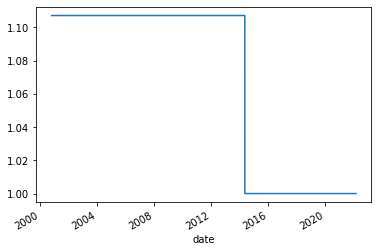

In [60]:
data['split_coefficient'].plot()

<AxesSubplot:xlabel='date'>

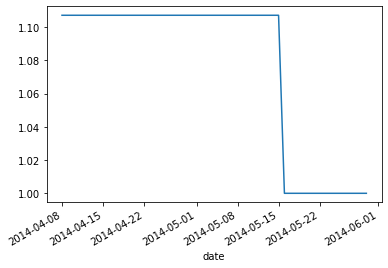

In [68]:
sub_data = data['2014-04-08':'2014-06-01']
sub_data['split_coefficient'].plot()


In [71]:
sub_data[['close','adj_close','split_coefficient','ref_open','ref_close']]

,close,adj_close,split_coefficient,ref_open,ref_close
date,,,,,
2014-04-08,12500,11290.733198,1.107103,12650,12500
2014-04-09,12900,11652.036660,1.107103,12500,12900
2014-04-10,12700,11471.384929,1.107103,12900,12700
2014-04-11,12150,10974.592668,1.107103,12700,12150
2014-04-14,12250,11064.918534,1.107103,12150,12250
2014-04-15,12050,10884.266802,1.107103,12250,12050
2014-04-16,12100,10929.429735,1.107103,12050,12100
2014-04-17,12100,10929.429735,1.107103,12100,12100
2014-04-18,12200,11019.755601,1.107103,12100,12200


In [ ]:
data['']

In [37]:
data['adj_close'].plot()

TypeError: no numeric data to plot

In [21]:
data['split_coefficient'] = (data['ref_close'] / data['ref_open'].shift(-1)).fillna(1)
data['split_coefficient'] = data['split_coefficient'].iloc[::-1].cumprod().iloc[::-1]
data['adj_close'] = data['close'] / data['split_coefficient']
data

,open,high,low,close,diff,volume,name,adj_close,market,amount,stock_num,cap,split_coefficient,ref_close,ref_open
date,,,,,,,,,,,,,,,
2000-01-04,400000,406500,340500,340500,-46000,299705,다음,68344.086022,KOSDAQ,1.050209e+11,6000050.0,2.043017e+12,4.982143,NaN,NaN
2000-01-05,300000,300000,300000,300000,-40500,11735,다음,60215.053763,KOSDAQ,3.520500e+09,6000050.0,1.800015e+12,4.982143,NaN,NaN
2000-01-06,285000,299000,264000,264000,-36000,287096,다음,52989.247312,KOSDAQ,7.770903e+10,6000050.0,1.584013e+12,4.982143,NaN,NaN
2000-01-07,232500,232500,232500,232500,-31500,12935,다음,46666.666667,KOSDAQ,3.007388e+09,6000050.0,1.395012e+12,4.982143,NaN,NaN
2000-01-10,232500,245000,205000,235000,2500,748874,다음,47168.458781,KOSDAQ,1.670613e+11,6000050.0,1.410012e+12,4.982143,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-22,91700,93200,91200,91800,-1400,1904605,카카오,91800.000000,KOSPI,1.752884e+11,445962051.0,4.093932e+13,1.000000,91800.0,93200.0
2022-02-23,92500,93800,91900,92600,800,1738804,카카오,92600.000000,KOSPI,1.612869e+11,445962051.0,4.129609e+13,1.000000,92600.0,91800.0
2022-02-24,91100,91800,89300,90000,-2600,2176721,카카오,90000.000000,KOSPI,1.968203e+11,445962051.0,4.013658e+13,1.000000,90000.0,92600.0


<AxesSubplot:xlabel='date'>

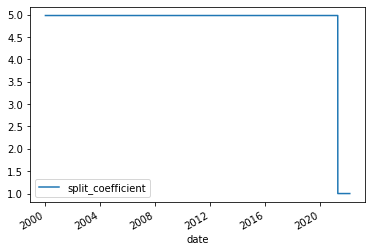

In [22]:
data[['split_coefficient']].plot()

In [28]:
data = data['2021-04-01':'2021-06-15']
data

,open,high,low,close,diff,volume,name,adj_close,market,amount,stock_num,cap,split_coefficient,ref_close,ref_open
date,,,,,,,,,,,,,,,
2021-04-01,500000,504000,492000,499000,1000,412423,카카오,100157.706093,KOSPI,2.057722e+11,88746712.0,4.428461e+13,4.982143,499000.0,498000.0
2021-04-02,508000,508000,499000,501000,2000,298641,카카오,100559.139785,KOSPI,1.498575e+11,88746712.0,4.446210e+13,4.982143,501000.0,499000.0
2021-04-05,503000,505000,500000,502000,1000,310400,카카오,100759.856631,KOSPI,1.560488e+11,88746712.0,4.455085e+13,4.982143,502000.0,501000.0
2021-04-06,506000,545000,505000,544000,42000,1724958,카카오,109189.964158,KOSPI,9.182750e+11,88746712.0,4.827821e+13,4.982143,544000.0,502000.0
2021-04-07,544000,544000,526000,542000,-2000,820896,카카오,108788.530466,KOSPI,4.400318e+11,88746712.0,4.810072e+13,4.982143,542000.0,544000.0
2021-04-08,539000,561000,534000,548000,6000,912514,카카오,109992.831541,KOSPI,5.007614e+11,88746712.0,4.863320e+13,4.982143,548000.0,542000.0
2021-04-09,554000,561000,551000,558000,10000,788839,카카오,112000.000000,KOSPI,4.382750e+11,88761861.0,4.952912e+13,4.982143,558000.0,548000.0
2021-04-12,0,0,0,558000,0,0,카카오,112000.000000,KOSPI,0.000000e+00,88761861.0,4.952912e+13,4.982143,558000.0,558000.0
2021-04-13,0,0,0,558000,0,0,카카오,112000.000000,KOSPI,0.000000e+00,88761861.0,4.952912e+13,4.982143,558000.0,558000.0


<AxesSubplot:xlabel='date'>

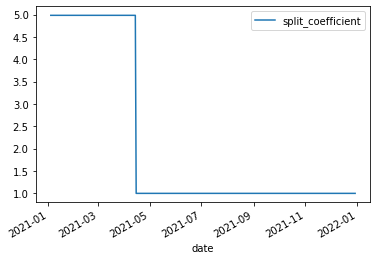

In [26]:
data[['split_coefficient']].plot()


In [45]:
data = data['1995-05-31':'2000-12-31']
data

,code,date,open,high,low,close,diff,volume,name,adj_close,market,amount,stock_num,cap,split_coefficient,ref_close,ref_open


In [8]:
# ['035720' ]
data = db.getDailyPrice('*', '2021-01-01', '2022-12-31')
# data = db.getDailyPrice('014280', '1995-01-31', '2022-12-31')
data.index = pd.to_datetime(data.index)

In [9]:
data.to_csv('db/daily_price/csv/20210101-20221231.csv')

In [1]:
import dask.dataframe as dd

df = dd.read_csv('db/daily_price/csv/*.csv')

In [9]:
data = df[df['code']==5930]

In [15]:
data['1995-05-02':'1995-06-01'].head()

/opt/dev/lib/python3.6/site-packages/dask/dataframe/core.py:6383: UserWarning: Insufficient elements for `head`. 5 elements requested, only 0 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,date,code,open,high,low,close,diff,volume,name,adj_close,market,amount,stock_num,cap,split_coefficient,ref_close,ref_open


In [31]:
xr_data = xr.Dataset.from_dataframe(data)


In [32]:
xr_data.to_zarr('db/daily_price/035720.zarr')

In [34]:
import zarr
xr_data2 = xr.open_zarr('db/daily_price/035720.zarr')

In [35]:
df = xr_data2.to_dataframe()

In [38]:
df

,adj_close,amount,cap,close,diff,high,low,market,name,open,ref_close,ref_open,split_coefficient,stock_num,volume
date,,,,,,,,,,,,,,,
1999-11-11,2248.028674,1.344000e+05,6.720056e+10,11200,1200,11200,11200,KOSDAQ,다음,11200,NaN,NaN,4.982143,6000050.0,12
1999-11-12,2508.960573,1.750000e+06,7.500062e+10,12500,1300,12500,12500,KOSDAQ,다음,12500,NaN,NaN,4.982143,6000050.0,140
1999-11-15,2810.035842,5.670000e+06,8.400070e+10,14000,1500,14000,14000,KOSDAQ,다음,14000,NaN,NaN,4.982143,6000050.0,405
1999-11-16,3141.218638,3.349100e+06,9.390078e+10,15650,1650,15650,15650,KOSDAQ,다음,15650,NaN,NaN,4.982143,6000050.0,214
1999-11-17,3512.544803,3.342500e+06,1.050009e+11,17500,1850,17500,17500,KOSDAQ,다음,17500,NaN,NaN,4.982143,6000050.0,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-14,NaN,3.796852e+11,4.617372e+13,103500,2000,105000,102000,KOSPI,카카오,102500,103500.0,101500.0,NaN,446122896.0,3656814
2022-03-15,NaN,1.826004e+11,4.595066e+13,103000,-500,104500,101000,KOSPI,카카오,103500,103000.0,103500.0,NaN,446122896.0,1778162
2022-03-16,NaN,1.824465e+11,4.639678e+13,104000,1000,105500,102000,KOSPI,카카오,105000,104000.0,103000.0,NaN,446122896.0,1763654


<AxesSubplot:xlabel='date'>

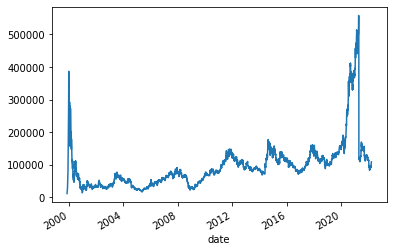

In [36]:
df['close'].plot()

<AxesSubplot:xlabel='date'>

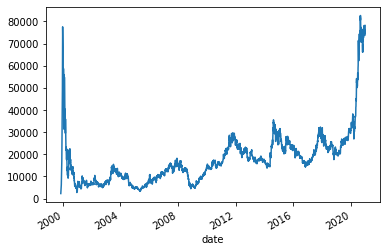

In [37]:
df['adj_close'].dropna().plot()

In [23]:
zgroup

<zarr.hierarchy.Group '/'>

In [6]:
data.to_csv('test.csv')

In [3]:
data['adj_close'].plot()

TypeError: no numeric data to plot

In [54]:
data =  data[['open','high','low','close','ref_open','ref_close','split_coefficient','adj_close']]
data = data['2018-04-15':'2018-05-15']
data['split_coefficient'] = (data['ref_close'] / data['ref_open'].shift(-1)).fillna(1)
data['split_coefficient'] = data['split_coefficient'].iloc[::-1].cumprod().iloc[::-1]
data['adj_close'] = data['close'] / data['split_coefficient']
data


,open,high,low,close,ref_open,ref_close,split_coefficient,adj_close
date,,,,,,,,
2018-04-16,2516000,2530000,2493000,2517000,2490000,2517000,50.0,50340.0
2018-04-17,2512000,2527000,2491000,2499000,2517000,2499000,50.0,49980.0
2018-04-18,2550000,2568000,2529000,2568000,2499000,2568000,50.0,51360.0
2018-04-19,2600000,2649000,2577000,2639000,2568000,2639000,50.0,52780.0
2018-04-20,2590000,2613000,2571000,2581000,2639000,2581000,50.0,51620.0
2018-04-23,2550000,2604000,2550000,2595000,2581000,2595000,50.0,51900.0
2018-04-24,2592000,2593000,2504000,2523000,2595000,2523000,50.0,50460.0
2018-04-25,2461000,2525000,2461000,2520000,2523000,2520000,50.0,50400.0
2018-04-26,2521000,2608000,2520000,2607000,2520000,2607000,50.0,52140.0


In [45]:
data

,open,high,low,close,ref_open,ref_close,split_coefficient,adj_close
date,,,,,,,,
2018-04-16,2516000,2530000,2493000,2517000,2490000,2517000,1.003614,1.279950e+08
2018-04-17,2512000,2527000,2491000,2499000,2517000,2499000,1.020262,1.275390e+08
2018-04-18,2550000,2568000,2529000,2568000,2499000,2568000,1.056022,1.337160e+08
2018-04-19,2600000,2649000,2577000,2639000,2568000,2639000,1.005062,1.451112e+08
2018-04-20,2590000,2613000,2571000,2581000,2639000,2581000,0.983327,1.426404e+08
2018-04-23,2550000,2604000,2550000,2595000,2581000,2595000,0.977528,1.410230e+08
2018-04-24,2592000,2593000,2504000,2523000,2595000,2523000,0.971098,1.340291e+08
2018-04-25,2461000,2525000,2461000,2520000,2523000,2520000,1.033294,1.300006e+08
2018-04-26,2521000,2608000,2520000,2607000,2520000,2607000,1.051587,1.389664e+08


In [19]:
ref_open = data[['ref_open']]
ref_close = data[['ref_close']].shift()
result = (ref_close['ref_close'] / ref_open['ref_open']).fillna(1)
result.iloc[::-1].cumprod().iloc[::-1]

date
2018-04-16    50.0
2018-04-17    50.0
2018-04-18    50.0
2018-04-19    50.0
2018-04-20    50.0
2018-04-23    50.0
2018-04-24    50.0
2018-04-25    50.0
2018-04-26    50.0
2018-04-27    50.0
2018-04-30    50.0
2018-05-02    50.0
2018-05-03    50.0
2018-05-04    50.0
2018-05-08     1.0
2018-05-09     1.0
2018-05-10     1.0
2018-05-11     1.0
2018-05-14     1.0
2018-05-15     1.0
dtype: float64

In [33]:
ref_open = sub_data[['ref_open']]
ref_close = sub_data[['ref_close']].shift()
ref_open

,ref_open
date,
2018-04-16,2490000
2018-04-17,2517000
2018-04-18,2499000
2018-04-19,2568000
2018-04-20,2639000
2018-04-23,2581000
2018-04-24,2595000
2018-04-25,2523000
2018-04-26,2520000


In [34]:
ref_close

,ref_close
date,
2018-04-16,NaN
2018-04-17,2517000.0
2018-04-18,2499000.0
2018-04-19,2568000.0
2018-04-20,2639000.0
2018-04-23,2581000.0
2018-04-24,2595000.0
2018-04-25,2523000.0
2018-04-26,2520000.0


<AxesSubplot:xlabel='date'>

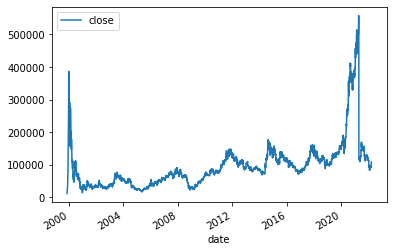

In [83]:
data[['close']].plot()


<AxesSubplot:xlabel='date'>

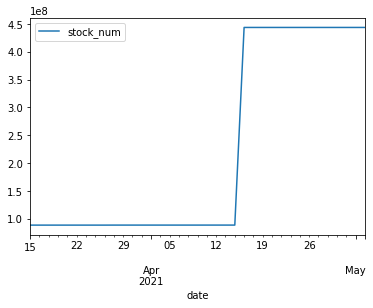

In [81]:
sub_data = data['2021-03-15':'2021-05-05']
sub_data[['stock_num']].plot()


In [82]:
sub_data

,open,high,low,close,diff,volume,name,adj_close,market,amount,stock_num,cap,split_coefficient
date,,,,,,,,,,,,,
2021-03-15,480000,482000,472000,479000,-2000,345981,카카오,None,KOSPI,1.651655e+11,88704620.0,4.248951e+13,None
2021-03-16,481000,485000,478000,479000,0,270853,카카오,None,KOSPI,1.301051e+11,88704620.0,4.248951e+13,None
2021-03-17,479000,491000,478000,485000,6000,403953,카카오,None,KOSPI,1.959317e+11,88704620.0,4.302174e+13,None
2021-03-18,488500,504000,486000,498000,13000,771697,카카오,None,KOSPI,3.833138e+11,88704620.0,4.417490e+13,None
2021-03-19,488500,497000,484000,492500,-5500,516981,카카오,None,KOSPI,2.536849e+11,88704620.0,4.368703e+13,None
2021-03-22,493000,496500,488000,494000,1500,315035,카카오,None,KOSPI,1.550586e+11,88704620.0,4.382008e+13,None
2021-03-23,496000,503000,485500,490500,-3500,379964,카카오,None,KOSPI,1.875358e+11,88704620.0,4.350962e+13,None
2021-03-24,486500,492000,482000,492000,1500,288563,카카오,None,KOSPI,1.409214e+11,88704620.0,4.364267e+13,None
2021-03-25,490000,491000,482000,485000,-7000,388531,카카오,None,KOSPI,1.885692e+11,88704620.0,4.302174e+13,None


<AxesSubplot:xlabel='date'>

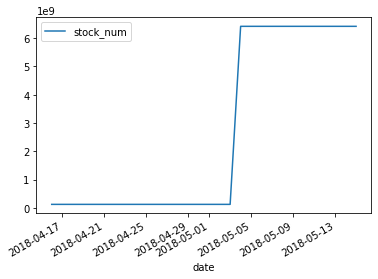

In [58]:
%matplotlib inline
sub_data = data['2018-04-15':'2018-05-15']
# price_data = data[['close']]
sub_data[['stock_num']].plot()

In [57]:
sub_data

,open,high,low,close,diff,volume,name,adj_close,market,amount,stock_num,cap,split_coefficient
date,,,,,,,,,,,,,
2018-04-16,2516000,2530000,2493000,2517000,27000,157549,삼성전자,None,KOSPI,396053424766,128386494,323148805398000,None
2018-04-17,2512000,2527000,2491000,2499000,-18000,155440,삼성전자,None,KOSPI,389065519000,128386494,320837848506000,None
2018-04-18,2550000,2568000,2529000,2568000,69000,269252,삼성전자,None,KOSPI,689012455000,128386494,329696516592000,None
2018-04-19,2600000,2649000,2577000,2639000,71000,343811,삼성전자,None,KOSPI,901505238771,128386494,338811957666000,None
2018-04-20,2590000,2613000,2571000,2581000,-58000,235220,삼성전자,None,KOSPI,609151778944,128386494,331365541014000,None
2018-04-23,2550000,2604000,2550000,2595000,14000,232380,삼성전자,None,KOSPI,600825481058,128386494,333162951930000,None
2018-04-24,2592000,2593000,2504000,2523000,-72000,315406,삼성전자,None,KOSPI,799555958105,128386494,323919124362000,None
2018-04-25,2461000,2525000,2461000,2520000,-3000,332292,삼성전자,None,KOSPI,826565905260,128386494,323533964880000,None
2018-04-26,2521000,2608000,2520000,2607000,87000,360931,삼성전자,None,KOSPI,931526175000,128386494,334703589858000,None


In [39]:
price_data.index = pd.to_datetime(price_data.index)


In [42]:
price_data['2018-01-31':'2018-02-02']

,close
date,
2018-01-31,2495000
2018-02-01,2491000
2018-02-02,2385000


In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 1
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.axisbelow'] = True
import mplfinance as mpf
import datetime as dt


In [3]:
import asyncio

async def add(a,b):
    print(f'add: {a} + {b}')
    await asyncio.sleep(1)
    return a+b

async def print_add(a,b):
    result = await add(a,b)
    print(f'print_add: {a} + {b} = {result}')


loop = asyncio.get_event_loop()
loop.run_until_complete(print_add(1,2))
loop.close()

RuntimeError: This event loop is already running

add: 1 + 2
print_add: 1 + 2 = 3


In [82]:
def getPivotTable(code_list, start_date, end_date):
    result = None
    for code in code_list:
        data = db.getDailyPrice(code, start_date=START, end_date=END)
        data = data[['close']]
        data = data.rename(columns = {'close': code})
        
        if result is None:
            result = data
        else:
            result = pd.concat([result, data],axis=1)
    
    return result


START = '2000-01-13'
END = '2010-01-23'
code_list = ["005940", "005930", "002020"]
# code_list = ["005940"]

data = getPivotTable(code_list, START, END)


data

,005940,005930,002020
date,,,
2000-01-13,25000,285500,8560
2000-01-14,24000,291500,8700
2000-01-17,24500,305000,8890
2000-01-18,23500,305000,8600
2000-01-19,22000,298000,7310
2000-01-20,22250,302000,7310
2000-01-21,21850,294000,7500
2000-01-24,21000,285000,8000
2000-01-25,21000,272000,8000


/opt/dev/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


<AxesSubplot:xlabel='date'>

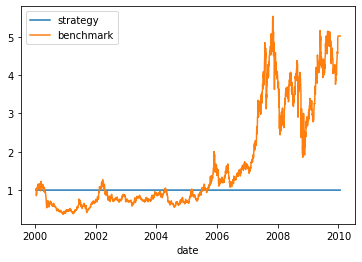

In [83]:
def backtest_strategy(data , symbol_trade, symbol_volatility, volatility_threshold, capital, symbol_benchmark):
    df_init = (data[symbol_trade]*0).to_frame().assign(cash = 0)
    df_update = (data[symbol_trade]*0).to_frame().assign(cash = 0)
    df_end = (data[symbol_trade]*0).to_frame().assign(cash = 0)
    
    df_init.iloc[0, df_init.columns.get_loc('cash')] = capital
    df_end.iloc[0, df_init.columns.get_loc('cash')] = capital

    calender = pd.Series(data.index).iloc[1:]

    for date in calender:
        prev_date = df_init.index[df_init.index < date][-1]

        df_init.loc[date, :] = df_end.loc[prev_date, :]
        port_value = df_init.loc[date, symbol_trade] * data.loc[date, symbol_trade] + df_init.loc[date, 'cash']

        # print(int(data.loc[date, symbol_volatility]), volatility_threshold)

        
        if int(data.loc[date, symbol_volatility]) > int(volatility_threshold) : 
            """ volatility is high -> be fully in cash """
            # print('volatility is high')
            df_end.loc[date, symbol_trade] = 0
            df_end.loc[date, 'cash'] = port_value
        else:
            """ volatility is low -> be in market position """
            # print('volatility is low')

            df_end.loc[date, symbol_trade] = port_value / data.loc[date, symbol_trade]
            df_end.loc[date,'cash'] = 0
        
        df_update.loc[date] = df_end.loc[date] - df_init.loc[date]

    portval = (df_end * data.assign(cash = 1)[[symbol_trade, 'cash']]).sum(axis = 1).to_frame().rename(columns = {0:'strategy'})
    portval['benchmark'] = data[symbol_benchmark]
    portval = portval / portval.iloc[0].values

    return portval

report = backtest_strategy(data, symbol_trade='005940', symbol_volatility='005930', volatility_threshold= 85000, capital= 1000000, symbol_benchmark= '002020')

report.plot()

In [26]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from zipline.api import order_target, record, symbol
from zipline.algorithm import TradingAlgorithm
import pandas

In [ ]:
print(db)

In [29]:
START = '2021-01-13'
END = '2022-01-23'
company = "005930"
data = db.getDailyPrice(company, start_date=START, end_date=END)


In [30]:
print(data.index)

DatetimeIndex(['2021-01-13', '2021-01-14', '2021-01-15', '2021-01-18',
               '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
               '2021-01-25', '2021-01-26',
               ...
               '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
               '2022-01-14', '2022-01-17', '2022-01-18', '2022-01-19',
               '2022-01-20', '2022-01-21'],
              dtype='datetime64[ns, UTC]', name='date', length=256, freq=None)


In [ ]:
plt.plot(data.index, data['close'])


In [ ]:
def initialize(context):
    context.i = 0
    context.sym = symbol('AAPL')

def handle_data(context, data):
    context.i += 1
    if context.i < 20:
        return


def handle_data(context, data):
    context.i += 1
    if context.i < 20:
        return

    ma5 = data.history(context.sym, 'price', 5, '1d').mean()
    ma20 = data.history(context.sym, 'price', 20, '1d').mean()

    if ma5 > ma20:
        order_target(context.sym, 1)
    else:
        order_target(context.sym, -1)
    record(AAPL=data.current(context.sym, "price"), ma5=ma5, ma20=ma20)

        


In [31]:
algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)
result = algo.run(data)

TypeError: __init__() missing 1 required positional argument: 'sim_params'

UnknownBundle: No bundle registered with the name 'alpaca_api'